In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')

In [3]:
train_data

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_data

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [5]:
cleaned_data = test_data.copy()
count = 0
list_drop = []
for index, row in test_data.iterrows():
    for col in range(len(row)):
        if(row[col] == '?'):
            count = count + 1
            list_drop.append(index)
            break
print(str(len(list_drop)) + ' rows with ? in any column ')
print('Before Cleaning, number of rows: ' + str(len(cleaned_data)))
cleaned_data = cleaned_data.drop(list_drop)
print('After Cleaning, number of rows: ' + str(len(cleaned_data)))
cleaned_data

1221 rows with ? in any column 
Before Cleaning, number of rows: 16282
After Cleaning, number of rows: 15061


,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [6]:
#type(cleaned_data)

In [7]:
work_data = cleaned_data.drop(0)

In [8]:
work_data.head()

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [9]:
above_fifty = work_data[work_data["Income"] == ">50K."]
below_fifty = work_data[work_data["Income"] == "<=50K."]

In [10]:
#above_fifty.head()
#below_fifty.head()

In [11]:
above_str = str(len(above_fifty.index))
print('Records with salary > 50K : ' + above_str)

Records with salary > 50K : 3700


In [12]:
below_str = str(len(below_fifty.index))
print('Records with salary <= 50K : ' + below_str)

Records with salary <= 50K : 11360


In [13]:
from collections import Counter as cnt
#import seaborn as sns
#sns.set_style('whitegrid')

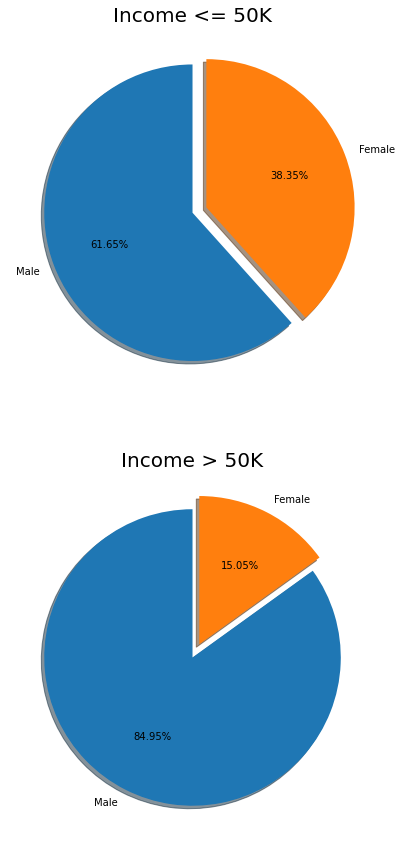

In [15]:
higher_sex = cnt(above_fifty['Sex'])
lower_sex = cnt(below_fifty['Sex'])
fig, ax = plt.subplots(2, 1, figsize = (10, 15))
explode = [0, 0.1]
ax[0].pie(lower_sex.values(), labels = lower_sex.keys(), autopct='%0.2f%%', explode = explode, shadow = True, startangle = 90)
ax[1].pie(higher_sex.values(), labels = higher_sex.keys(), autopct='%0.2f%%', explode = explode, shadow = True, startangle = 90)
ax[0].set_title('Income <= 50K', size = 20)
ax[1].set_title('Income > 50K', size = 20)
plt.show()

In [16]:
work_data['Education'].describe()

count       15060
unique         16
top       HS-grad
freq         4943
Name: Education, dtype: object

In [17]:
work_data['Education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [18]:
'''
higher_ed = cnt(above_fifty['Education'])
lower_ed = cnt(below_fifty['Education'])
fig, ax = plt.subplots(2, 1, figsize = (10, 15))
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
ax[0].pie(lower_ed.values(), labels = lower_ed.keys(), autopct='%0.2f%%', explode = explode, shadow = True, startangle = 90)
ax[1].pie(higher_ed.values(), labels = higher_ed.keys(), autopct='%0.2f%%', explode = explode, shadow = True, startangle = 90)
#ax[0].set_title('Income <= 50K', size = 20)
#ax[1].set_title('Income > 50K', size = 20)
plt.show()
''';

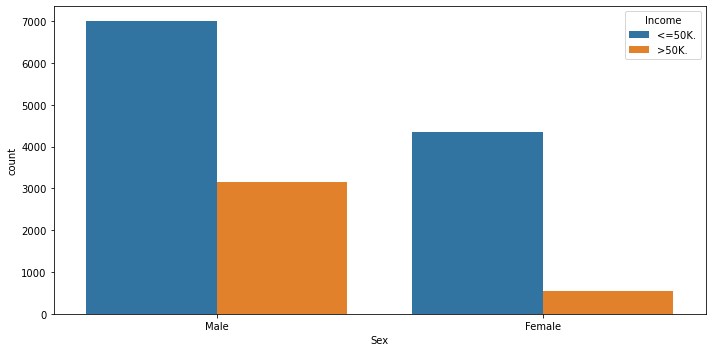

In [24]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Sex', hue = 'Income', data = work_data)
plt.tight_layout()
plt.show();

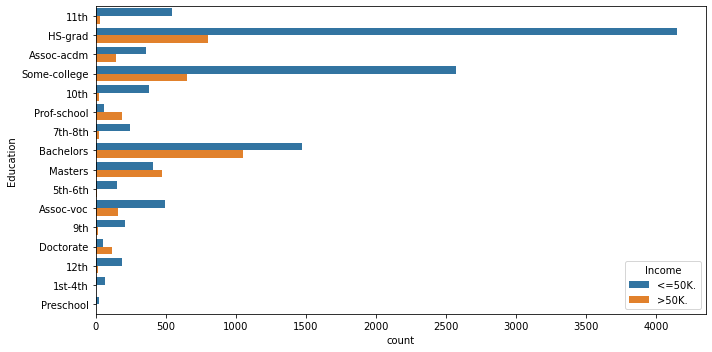

In [25]:
plt.figure(figsize = (10, 5))
sns.countplot(y = 'Education', hue = 'Income', data = work_data)
plt.tight_layout()
plt.show();